In [1]:
# imports and dependencies, api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import datetime

import gmaps

In [2]:
# import gmaps API key for heat map
#from config import gkey

# Configure gmaps
#gmaps.configure(api_key=gkey)

In [3]:
# file to load
path = "./Accident_Info.csv"

In [4]:
# initial data read for San Francisco
data = pd.read_csv( path )

In [5]:
# Clean data of duplicates and missing values, rename columns
df = pd.DataFrame( data )

In [6]:
# formatting of data, NaN handling
df = df[["Accident_Index", "Accident_Severity",
         "Date", "Day_of_Week",
         "Junction_Control", "Junction_Detail",
         "Latitude", "Longitude", "Light_Conditions",
         "Road_Surface_Conditions", "Speed_limit",
         "Time", "Urban_or_Rural_Area",
         "Weather_Conditions", "Year"]]
df = df.rename(index=str, columns={"Accident_Index": "Accident",
                                   "Accident_Severity": "Severity",
                                   "Day_of_Week": "Day",
                                   "Junction_Control": "Traffic Control",
                                   "Junction_Detail": "Junction Type",
                                   "Light_Conditions": "Light",
                                   "Road_Surface_Conditions": "Road Cond.",
                                   "Speed_limit": "Speed Limit",
                                   "Urban_or_Rural_Area": "City Type",
                                   "Weather_Conditions": "Weather"})
df = df.set_index( "Accident" )

In [7]:
# preview of data
df.head()

,Severity,Date,Day,Traffic Control,Junction Type,Latitude,Longitude,Light,Road Cond.,Speed Limit,Time,City Type,Weather,Year
Accident,,,,,,,,,,,,,,
200501BS00001,Serious,1/4/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,51.489096,-0.191170,Daylight,Wet or damp,30,17:42,Urban,Raining no high winds,2005
200501BS00002,Slight,1/5/2005,Wednesday,Auto traffic signal,Crossroads,51.520075,-0.211708,Darkness - lights lit,Dry,30,17:36,Urban,Fine no high winds,2005
200501BS00003,Slight,1/6/2005,Thursday,Data missing or out of range,Not at junction or within 20 metres,51.525301,-0.206458,Darkness - lights lit,Dry,30,0:15,Urban,Fine no high winds,2005
200501BS00004,Slight,1/7/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,51.482442,-0.173862,Daylight,Dry,30,10:35,Urban,Fine no high winds,2005
200501BS00005,Slight,1/10/2005,Monday,Data missing or out of range,Not at junction or within 20 metres,51.495752,-0.156618,Darkness - lighting unknown,Wet or damp,30,21:13,Urban,Fine no high winds,2005


## Subject Headline

### Subject focus

trend1 description / question / prompt

In [8]:
# Store latitude and longitude in locations
locations = df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
df_sev = df["Severity"]

#convert severity into 1 2 or 3 in a new list

new_list = []
for severity_value in df_sev:
   if severity_value == "Slight":
       new_list.append(.05)
   if severity_value == "Serious":
       new_list.append(.5)
   if severity_value == "Fatal":
       new_list.append(5)

#.astype(float)

In [9]:
# re-format/style data for trend1

In [10]:
# manipulate data
# setup analysis

In [11]:
# preview of data

In [12]:
# visualization of data
# consider the best visualization for what you want to show

In [13]:
# free space

trend2 description / question / prompt

In [14]:
# Plot Heatmap
map = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = new_list,
                                dissipating=False, max_intensity=2,
                                point_radius=.0027)


# Add layer
map.add_layer(heat_layer)

# Display figure
map

Figure(layout=FigureLayout(height='420px'))

In [15]:
# manipulate data
# setup analysis

In [16]:
# preview of data

In [17]:
# visualization of data
# consider the best visualization for what you want to show

In [18]:
# free space

trend3 description / question / prompt

In [19]:
# re-format/style data for trend3

In [20]:
# manipulate data
# setup analysis

In [21]:
# preview of data

In [22]:

# visualization of data
# consider the best visualization for what you want to show

Any comments on observations?

## Subject Headline

### Subject focus

trend1 description / question / prompt

In [23]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
light = df.groupby(['Light', 'Severity']).count()

# Convert to DataFrame
light_df = pd.DataFrame( light )[['Year']]

# Preview DataFrame
light_df

Year
Light                       Severity       
Darkness - lighting unknown Fatal         5
                            Serious      71
                            Slight      450
Darkness - lights lit       Fatal       494
                            Serious    6037
                            Slight    34428
Darkness - lights unlit     Fatal         3
                            Serious      43
                            Slight      233
Darkness - no lighting      Fatal        11
                            Serious      39
                            Slight      151
Daylight                    Fatal       618
                            Serious   12175
                            Slight    90464

No handles with labels found to put in legend.


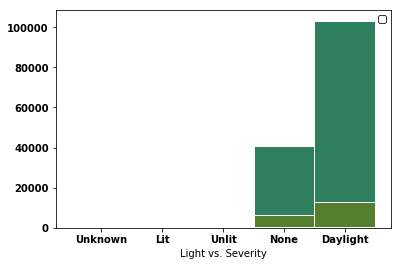

In [24]:
# Stacked bar chart
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1_fatal = [3, 5, 11, 494, 618]
bars2_serious = [39, 43, 71, 6037, 12175]
bars3_slight = [151, 233, 450, 34428, 90464]
 
# Heights of bars1 + bars2
bars = np.add(bars1_fatal, bars2_serious).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['Unknown','Lit','Unlit','None','Daylight']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1_fatal, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2_serious, bottom=bars1_fatal, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3_slight, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Light vs. Severity")
 
# Show graphic
plt.legend(loc ='upper right', frameon = True, edgecolor = 'black')
plt.show()

In [25]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
light_donut = df.groupby(['Severity', 'Light']).count()

# Convert to DataFrame
light_donut_df = pd.DataFrame( light )[['Year']]

# Preview DataFrame
light_donut_df

Year
Light                       Severity       
Darkness - lighting unknown Fatal         5
                            Serious      71
                            Slight      450
Darkness - lights lit       Fatal       494
                            Serious    6037
                            Slight    34428
Darkness - lights unlit     Fatal         3
                            Serious      43
                            Slight      233
Darkness - no lighting      Fatal        11
                            Serious      39
                            Slight      151
Daylight                    Fatal       618
                            Serious   12175
                            Slight    90464

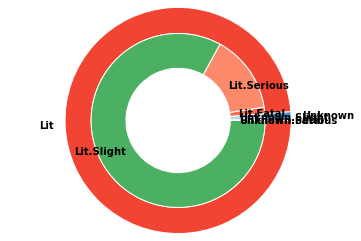

In [26]:
# Donut plot with subgroups
# Make data: I have 5 groups and 3 subgroups
group_names=['Unknown', 'Lit']
group_size=[526,40959]
subgroup_names=['Unknown.Fatal', 'Unknown.Serious', 'Unknown.Slight', 'Lit.Fatal', 'Lit.Serious', 'Lit.Slight']
subgroup_size=[5,71,450,494,6037,34428]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


In [27]:
# preview of data

In [28]:
# visualization of data
# consider the best visualization for what you want to show

In [29]:
# free space

trend2 description / question / prompt

In [30]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
weather = df.groupby(['Weather','Severity']).count()

# Convert to DataFrame
weather_df = pd.DataFrame( weather )[['Year']]

# Preview DataFrame
weather_df

Year
Weather               Severity        
Fine + high winds     Fatal         12
                      Serious      116
                      Slight       595
Fine no high winds    Fatal        992
                      Serious    15774
                      Slight    107849
Fog or mist           Fatal          5
                      Serious       42
                      Slight       260
Other                 Fatal         12
                      Serious      302
                      Slight      1706
Raining + high winds  Fatal          5
                      Serious       95
                      Slight       550
Raining no high winds Fatal         94
                      Serious     1819
                      Slight     13028
Snowing + high winds  Serious        8
                      Slight        49
Snowing no high winds Fatal          1
                      Serious       60
                      Slight       674
Unknown               Fatal         10
                      Serious      149
                      Slight      1015

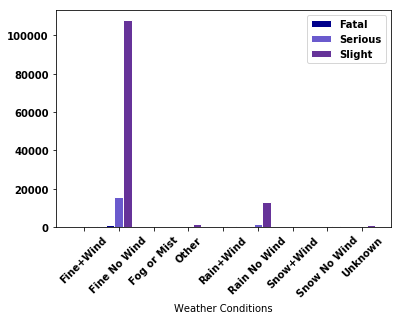

In [31]:
# Bar chart
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 992, 5, 12, 5, 94, 0, 1, 10]
bars2 = [116, 15774, 42, 302, 95, 1819, 8, 60, 149]
bars3 = [595, 107849, 260, 1706, 550, 13028, 49, 674, 1015]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='darkblue', width=barWidth, edgecolor='white', label='Fatal')
plt.bar(r2, bars2, color='slateblue', width=barWidth, edgecolor='white', label='Serious')
plt.bar(r3, bars3, color='rebeccapurple', width=barWidth, edgecolor='white', label='Slight')
 
# Add xticks on the middle of the group bars
plt.xlabel('Weather Conditions')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Fine+Wind', 'Fine No Wind', 'Fog or Mist', 'Other', 'Rain+Wind', 'Rain No Wind', 'Snow+Wind', 'Snow No Wind', 'Unknown'], rotation = 45)
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [32]:
# preview of data

In [33]:
# visualization of data
# consider the best visualization for what you want to show

In [34]:
# free space

trend3 description / question / prompt

In [35]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )
time = df.groupby(['Severity','Time']).count()

# Convert to DataFrame
time_df = pd.DataFrame( time )[['Year']]

# Preview DataFrame
time_df

Year
Severity Time      
Fatal    0:01     3
         0:04     1
         0:05     2
         0:09     3
         0:10     2
         0:11     1
         0:12     1
         0:15     3
         0:18     6
         0:20     2
         0:22     2
         0:24     2
         0:29     3
         0:30     1
         0:33     3
         0:35     3
         0:36     1
         0:37     1
         0:38     1
         0:39     1
         0:40     3
         0:41     1
         0:42     1
         0:43     3
         0:47     1
         0:48     2
         0:50     2
         0:53     1
         0:54     2
         0:55     1
...             ...
Slight   9:30   642
         9:31    20
         9:32    34
         9:33    47
         9:34    37
         9:35   210
         9:36    38
         9:37    45
         9:38    53
         9:39    35
         9:40   327
         9:41    34
         9:42    46
         9:43    52
         9:44    40
         9:45   350
         9:46    35
         9:47    40
         9:48    45
         9:49    36
         9:50   370
         9:51    33
         9:52    54
         9:53    42
         9:54    48
         9:55   188
         9:56    37
         9:57    36
         9:58    47
         9:59    31

[3503 rows x 1 columns]

In [36]:
# line chart
#https://stackoverflow.com/questions/1574088/plotting-time-in-python-with-matplotlib
#https://matplotlib.org/gallery/api/two_scales.html
# Data
df=pd.DataFrame({'x': datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12),
                 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11),
                 'y3': np.random.randn(10)+range(11,21)})

# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='', color='skyblue', linewidth=2, label="Fatal")
plt.plot( 'x', 'y2', data=df, marker='', color='orange', linewidth=2, label="Serious")
plt.plot( 'x', 'y3', data=df, marker='', color='red', linewidth=2, label="Slight")
plt.legend()

# beautify the x-labels
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.show()

SyntaxError: invalid syntax (<ipython-input-36-6e1dd68eca85>, line 5)

In [ ]:
# preview of data

In [ ]:
# visualization of data
# consider the best visualization for what you want to show

Any comments on observations?

## Subject Headline

### Subject focus

trend1 description / question / prompt

In [ ]:
# pull above data - CHANGE data REFERENCE ( don't rewrite master copy of data )

In [ ]:
# re-format/style data for trend1

In [ ]:
# manipulate data
# setup analysis

In [ ]:
# preview of data

In [ ]:
# visualization of data
# consider the best visualization for what you want to show

In [ ]:
# free space

trend2 description / question / prompt

In [ ]:
# re-format/style data for trend2

In [ ]:
# manipulate data
# setup analysis

In [ ]:
# preview of data

In [ ]:
# visualization of data
# consider the best visualization for what you want to show

In [ ]:
# free space

trend3 description / question / prompt

In [ ]:
# re-format/style data for trend3

In [ ]:
# manipulate data
# setup analysis

In [ ]:
# preview of data

In [ ]:
# visualization of data
# consider the best visualization for what you want to show

Any comments on observations?